In [2]:

%matplotlib inline

import numpy as np
import pandas as pd
from sodapy import Socrata
import requests
from datetime import datetime, timedelta, date
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

HOME_PATH = ('/hdd/311/EMS')
import warnings
warnings.filterwarnings("ignore")


In [54]:

# https://data.cityofnewyork.us/resource/erm2-nwe9.json
msg = "https://data.cityofnewyork.us/resource/76xm-jjuj.json?$limit=50000"
res = requests.get(msg, stream=True)
res.json()


[{'cad_incident_id': '220904738',
  'incident_datetime': '2022-03-31T23:59:52.000',
  'initial_call_type': 'STNDBY',
  'initial_severity_level_code': '8',
  'final_call_type': 'STNDBY',
  'final_severity_level_code': '8',
  'valid_dispatch_rspns_time_indc': 'N',
  'dispatch_response_seconds_qy': '0',
  'valid_incident_rspns_time_indc': 'N',
  'incident_close_datetime': '2022-03-31T23:59:52.000',
  'held_indicator': 'N',
  'borough': 'MANHATTAN',
  'incident_dispatch_area': 'M7',
  'zipcode': '10035',
  'policeprecinct': '25',
  'citycouncildistrict': '8',
  'communitydistrict': '111',
  'communityschooldistrict': '4',
  'congressionaldistrict': '12',
  'reopen_indicator': 'N',
  'special_event_indicator': 'N',
  'standby_indicator': 'Y',
  'transfer_indicator': 'N'},
 {'cad_incident_id': '220904735',
  'incident_datetime': '2022-03-31T23:59:45.000',
  'initial_call_type': 'DRUG',
  'initial_severity_level_code': '4',
  'final_call_type': 'DRUG',
  'final_severity_level_code': '4',
  'f

In [55]:

file_path = HOME_PATH + "EMS" + ".json"
f = Path(file_path)
f.touch(exist_ok=True)
with open(f, "w") as outfile:
    json.dump(res.json(), outfile, indent=4)


In [143]:

with open(file_path, encoding='utf-8') as inputfile:
    df = pd.read_json(inputfile)
df.to_csv(HOME_PATH+"EMS.csv", encoding='utf-8', index=False)


In [144]:

df = pd.read_csv(HOME_PATH+"EMS.csv", encoding='utf-8')
df


cad_incident_id        incident_datetime initial_call_type  \
0            220904738  2022-03-31T23:59:52.000            STNDBY   
1            220904735  2022-03-31T23:59:45.000              DRUG   
2            220904734  2022-03-31T23:59:02.000              DRUG   
3            220904733  2022-03-31T23:58:37.000            TRAUMA   
4            220904732  2022-03-31T23:58:19.000              SICK   
...                ...                      ...               ...   
49995        220782275  2022-03-19T13:27:44.000            INJURY   
49996        220782274  2022-03-19T13:27:35.000            PEDSTR   
49997        220782273  2022-03-19T13:27:34.000            INJURY   
49998        220782272  2022-03-19T13:27:25.000            INJURY   
49999        220782270  2022-03-19T13:27:14.000               UNC   

       initial_severity_level_code final_call_type  final_severity_level_code  \
0                                8          STNDBY                          8   
1                                4            DRUG                          4   
2                                4            DRUG                          4   
3                                2          TRAUMA                          2   
4                                6            SICK                          6   
...                            ...             ...                        ...   
49995                            5          INJURY                          5   
49996                            3          PEDSTR                          3   
49997                            5          INJURY                          5   
49998                            5          INJURY                          5   
49999                            2             UNC                          2   

      valid_dispatch_rspns_time_indc  dispatch_response_seconds_qy  \
0                                  N                             0   
1                                  Y                             0   
2                                  Y                            11   
3                                  Y                            33   
4                                  Y                            61   
...                              ...                           ...   
49995                              Y                            22   
49996                              Y                             5   
49997                              Y                            12   
49998                              Y                            16   
49999                              Y                            19   

      valid_incident_rspns_time_indc  incident_close_datetime  ...  \
0                                  N  2022-03-31T23:59:52.000  ...   
1                                  Y  2022-04-01T00:45:52.000  ...   
2                                  Y  2022-04-01T00:55:56.000  ...   
3                                  Y  2022-04-01T00:12:02.000  ...   
4                                  Y  2022-04-01T01:05:19.000  ...   
...                              ...                      ...  ...   
49995                              Y  2022-03-19T13:41:57.000  ...   
49996                              Y  2022-03-19T15:00:04.000  ...   
49997                              Y  2022-03-19T15:32:01.000  ...   
49998                              Y  2022-03-19T13:34:44.000  ...   
49999                              Y  2022-03-19T14:27:22.000  ...   

      standby_indicator transfer_indicator first_assignment_datetime  \
0                     Y                  N                       NaN   
1                     N                  N   2022-03-31T23:59:45.000   
2                     N                  N   2022-03-31T23:59:13.000   
3                     N                  N   2022-03-31T23:59:10.000   
4                     N                  N   2022-03-31T23:59:20.000   
...                 ...                ...                       ...   
49995              

In [145]:

df = df[df['incident_travel_tm_seconds_qy'].notna()]
df = df[df['incident_response_seconds_qy'].notna()]
df = df[df['zipcode'].notna()]


In [146]:

df['incident_datetime'] = pd.to_datetime(df['incident_datetime'])
df['first_assignment_datetime'] = pd.to_datetime(df['first_assignment_datetime'])
df['first_activation_datetime'] = pd.to_datetime(df['first_activation_datetime'])
df['first_on_scene_datetime'] = pd.to_datetime(df['first_on_scene_datetime'])


In [147]:
df

cad_incident_id   incident_datetime initial_call_type  \
1            220904735 2022-03-31 23:59:45              DRUG   
2            220904734 2022-03-31 23:59:02              DRUG   
3            220904733 2022-03-31 23:58:37            TRAUMA   
4            220904732 2022-03-31 23:58:19              SICK   
5            220904731 2022-03-31 23:58:10            INJURY   
...                ...                 ...               ...   
49995        220782275 2022-03-19 13:27:44            INJURY   
49996        220782274 2022-03-19 13:27:35            PEDSTR   
49997        220782273 2022-03-19 13:27:34            INJURY   
49998        220782272 2022-03-19 13:27:25            INJURY   
49999        220782270 2022-03-19 13:27:14               UNC   

       initial_severity_level_code final_call_type  final_severity_level_code  \
1                                4            DRUG                          4   
2                                4            DRUG                          4   
3                                2          TRAUMA                          2   
4                                6            SICK                          6   
5                                5          INJURY                          5   
...                            ...             ...                        ...   
49995                            5          INJURY                          5   
49996                            3          PEDSTR                          3   
49997                            5          INJURY                          5   
49998                            5          INJURY                          5   
49999                            2             UNC                          2   

      valid_dispatch_rspns_time_indc  dispatch_response_seconds_qy  \
1                                  Y                             0   
2                                  Y                            11   
3                                  Y                            33   
4                                  Y                            61   
5                                  Y                            34   
...                              ...                           ...   
49995                              Y                            22   
49996                              Y                             5   
49997                              Y                            12   
49998                              Y                            16   
49999                              Y                            19   

      valid_incident_rspns_time_indc  incident_close_datetime  ...  \
1                                  Y  2022-04-01T00:45:52.000  ...   
2                                  Y  2022-04-01T00:55:56.000  ...   
3                                  Y  2022-04-01T00:12:02.000  ...   
4                                  Y  2022-04-01T01:05:19.000  ...   
5                                  Y  2022-04-01T00:51:18.000  ...   
...                              ...                      ...  ...   
49995                              Y  2022-03-19T13:41:57.000  ...   
49996                              Y  2022-03-19T15:00:04.000  ...   
49997                              Y  2022-03-19T15:32:01.000  ...   
49998                              Y  2022-03-19T13:34:44.000  ...   
49999                              Y  2022-03-19T14:27:22.000  ...   

      standby_indicator transfer_indicator first_assignment_datetime  \
1                     N                  N       2022-03-31 23:59:45   
2                     N                  N       2022-03-31 23:59:13   
3                     N                  N       2022-03-31 23:59:10   
4                     N                  N       2022-03-31 23:59:20   
5                     N                  N       2022-03-31 23:58:44   
...                 ...                ...                       ...   
49995                 N                  N       2022-03-19 13:28:06   
49996  

In [148]:
plt.plot(df.incident_response_seconds_qy)

0.0 31524.0
Analysis on response time.


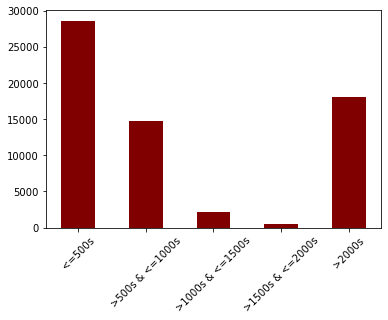

In [157]:
response_time = df.incident_response_seconds_qy.to_list()

print(min(response_time), max(response_time))

leq_500 = len([i for i in response_time if i<=500])
leq_1000 = len([i for i in response_time if i>500 and i<=1000])
leq_1500 = len([i for i in response_time if i>1000 and i<=1500])
leq_2000 = len([i for i in response_time if i>1500 and i<=2000])
g_2000 = len([i for i in response_time if i>500])

plt_x = ["<=500s", ">500s & <=1000s", ">1000s & <=1500s", ">1500s & <=2000s", ">2000s"]
plt_ls = [leq_500, leq_1000, leq_1500, leq_2000, g_2000]

print("Analysis on response time.")
plt.bar(plt_x, plt_ls, color ='maroon', width = 0.5)
plt.xticks(rotation = 45)
plt.show()

In [158]:
plt.plot(df.incident_travel_tm_seconds_qy)

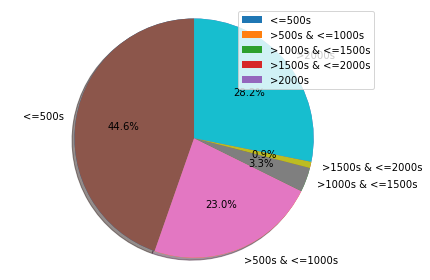

In [151]:

labels = plt_x
sizes = [ g/sum(plt_ls) for g in [leq_500, leq_1000, leq_1500, leq_2000, g_2000]]
explode = (0.1, 0, 0, 0, 0)

fig1, ax1 = plt.subplots()
patches, texts = plt.pie(sizes, startangle=90)
plt.legend(patches, labels, loc="best")
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.show()


0.0 10793.0
Analysis on travel time.


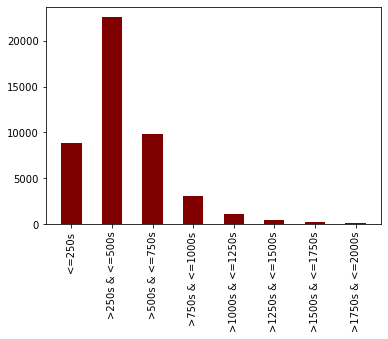

In [152]:
travel_time = df.incident_travel_tm_seconds_qy.to_list()

print(min(travel_time), max(travel_time))

leq_250 = len([i for i in travel_time if i<=250])
leq_500 = len([i for i in travel_time if i>250 and i<=500])
leq_750 = len([i for i in travel_time if i>500 and i<=750])
leq_1000 = len([i for i in travel_time if i>750 and i<=1000])
leq_1250 = len([i for i in travel_time if i>1000 and i<=1250])
leq_1500 = len([i for i in travel_time if i>1250 and i<=1500])
leq_1750 = len([i for i in travel_time if i>1500 and i<=1750])
leq_2000 = len([i for i in travel_time if i>1750 and i<=2000])

plt_x = ["<=250s", ">250s & <=500s", ">500s & <=750s", ">750s & <=1000s",
         ">1000s & <=1250s", ">1250s & <=1500s", ">1500s & <=1750s", ">1750s & <=2000s"]
plt_ls = [leq_250, leq_500, leq_750, leq_1000, leq_1250, leq_1500, leq_1750, leq_2000]

print("Analysis on travel time.")
plt.bar(plt_x, plt_ls, color ='maroon', width = 0.5)
plt.xticks(rotation = 90)
plt.show()

In [163]:
travel_time = np.array(travel_time).reshape(-1, 1)
response_time = np.array(response_time).reshape(-1, 1)
response_time = response_time-travel_time

print(response_time.shape, travel_time.shape)

(46662, 1) (46662, 1)


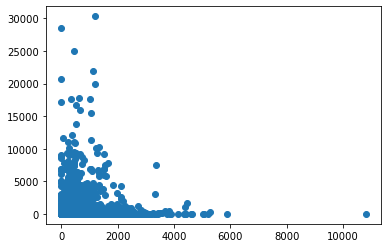

In [170]:
plt.scatter(travel_time, response_time)
plt.show()

Analyze correlation between dispatch time and travel time.
[[0.07443211]]
0.001835320332658541
Select random response time and predict travel time.


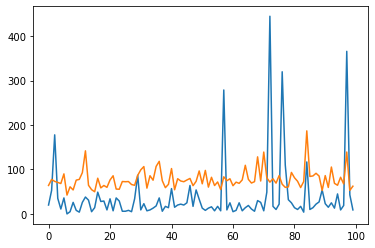

The model is a good fit.


In [168]:
from sklearn.linear_model import LinearRegression

print("Analyze correlation between dispatch time and travel time.")

reg = LinearRegression().fit(travel_time, response_time)
print(reg.coef_)
print(reg.score(travel_time, response_time))

print("Select random response time and predict travel time.")
idx = np.random.choice(np.arange(len(travel_time)), 100, replace=False)
x_sample = travel_time[idx]
y_sample = response_time[idx]

y_hat = reg.predict(x_sample)
plt.plot(y_sample)
plt.plot(y_hat)
plt.show()

print("The model is a good fit.")

In [28]:

nyc_zip_code = [
    10031, 10032, 10033, 10034, 10040,
    10026, 10027, 10030, 10037, 10039,
    10029, 10035,
    10024, 10025,
    10021, 10028, 10044, 10065, 10075, 10128,
    10001, 10011, 10018, 10019, 10020, 10036,
    10010, 10016, 10017, 10022,
    10012, 10013, 10014,
    10002, 10003, 10009,
    10004, 10005, 10006, 10007, 10038, 10280,
    10302, 10303, 10310,
    10306, 10307, 10308, 10309, 10312,
    10301, 10304, 10305,
    10314,
    10463, 10471,
    10466, 10469, 10470, 10475,
    10453, 10457, 10460,
    10458, 10467, 10468,
    10461, 10462, 10464, 10465, 10472, 10473,
    10451, 10452, 10456,
    10454, 10455, 10459, 10474,
    11101, 11102, 11103, 11104, 11105, 11106,
    11368, 11369, 11370, 11372, 11373, 11377, 11378,
    11354, 11355, 11356, 11357, 11358, 11359, 11360,
    11361, 11362, 11363, 11364,
    11374, 11375, 11379, 11385,
    11365, 11366, 11367,
    11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421,
    11412, 11423, 11432, 11433, 11434, 11435, 11436,
    11004, 11005, 11411, 11413, 11422, 11426, 11427, 11428, 11429,
    11691, 11692, 11693, 11694, 11695, 11697,
    11211, 11222,
    11201, 11205, 11215, 11217, 11231,
    11212, 11213, 11216, 11233, 11238,
    11207, 11208,
    11220, 11232,
    11209, 11214, 11228,
    11204, 11218, 11219, 11230,
    11234, 11236, 11239,
    11223, 11224, 11229, 11235,
    11203, 11210, 11225, 11226,
    11206, 11221, 11237
]

print(len(nyc_zip_code))


177


In [117]:

df_sex_age = pd.read_csv(HOME_PATH+"/ACSDP5Y2021.DP05-Data.csv", encoding='utf-8')
print(df_sex_age.columns)
df_sex_age.head()


Index(['GEO_ID', 'NAME', 'DP05_0001E', 'DP05_0001EA', 'DP05_0001M',
       'DP05_0001MA', 'DP05_0002E', 'DP05_0002M', 'DP05_0002MA', 'DP05_0002EA',
       ...
       'DP05_0087PEA', 'DP05_0088PE', 'DP05_0088PM', 'DP05_0088PMA',
       'DP05_0088PEA', 'DP05_0089PE', 'DP05_0089PM', 'DP05_0089PMA',
       'DP05_0089PEA', 'Unnamed: 714'],
      dtype='object', length=715)


GEO_ID                  NAME  \
0       Geography  Geographic Area Name   
1  860Z200US06390           ZCTA5 06390   
2  860Z200US10001           ZCTA5 10001   
3  860Z200US10002           ZCTA5 10002   
4  860Z200US10003           ZCTA5 10003   

                                DP05_0001E  \
0  Estimate!!SEX AND AGE!!Total population   
1                                       58   
2                                    26966   
3                                    76807   
4                                    54447   

                                         DP05_0001EA  \
0  Annotation of Estimate!!SEX AND AGE!!Total pop...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                       DP05_0001M  \
0  Margin of Error!!SEX AND AGE!!Total population   
1                                              36   
2                                            1911   
3                                            3172   
4                                            2660   

                                         DP05_0001MA  \
0  Annotation of Margin of Error!!SEX AND AGE!!To...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                      DP05_0002E  \
0  Estimate!!SEX AND AGE!!Total population!!Male   
1                                             25   
2                                          12570   
3                                          38640   
4                                          27219   

                                          DP05_0002M  \
0  Margin of Error!!SEX AND AGE!!Total population...   
1                                                 19   
2                                               1169   
3                                               2214   
4                                               1755   

                                         DP05_0002MA  \
0  Annotation of Margin of Error!!SEX AND AGE!!To...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                         DP05_0002EA  ...  \
0  Annotation of Estimate!!SEX AND AGE!!Total pop...  ...   
1                                                NaN  ...   
2                                                NaN  ...   
3                                                NaN  ...   
4                                                NaN  ...   

                                        DP05_0087PEA  \
0  Annotation of Percent!!CITIZEN, VOTING AGE POP...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                         DP05_0088PE  \
0  Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...   
1                                               40.4   
2                                               45.9   
3                                               49.5   
4                                               50.1   

                                         DP05_0088PM  \
0  Percent Margin of Error!!CITIZEN, VOTING AGE P...   
1                                               16.9   
2                                                3.1   
3                                                2.1   
4                                                2.5   

                                        DP05_0088PMA  \
0  Annotation of Percent Margin of Error!!CITIZEN...   
1    

In [118]:

all_rows = []
for index, row in df_sex_age.iterrows():
    if index>0 and int(row["NAME"][5:]) in nyc_zip_code:
        all_rows.append(row)
        
all_rows


[GEO_ID          860Z200US10001
 NAME               ZCTA5 10001
 DP05_0001E               26966
 DP05_0001EA                NaN
 DP05_0001M                1911
                      ...      
 DP05_0089PE               54.1
 DP05_0089PM                3.1
 DP05_0089PMA               NaN
 DP05_0089PEA               NaN
 Unnamed: 714               NaN
 Name: 2, Length: 715, dtype: object,
 GEO_ID          860Z200US10002
 NAME               ZCTA5 10002
 DP05_0001E               76807
 DP05_0001EA                NaN
 DP05_0001M                3172
                      ...      
 DP05_0089PE               50.5
 DP05_0089PM                2.1
 DP05_0089PMA               NaN
 DP05_0089PEA               NaN
 Unnamed: 714               NaN
 Name: 3, Length: 715, dtype: object,
 GEO_ID          860Z200US10003
 NAME               ZCTA5 10003
 DP05_0001E               54447
 DP05_0001EA                NaN
 DP05_0001M                2660
                      ...      
 DP05_0089PE               4

In [119]:

all_population = {}
for ln in all_rows:
    all_population[int(ln["NAME"][5:])] = int(ln["DP05_0001E"])
all_population


{10001: 26966,
 10002: 76807,
 10003: 54447,
 10004: 4795,
 10005: 8637,
 10006: 3894,
 10007: 8194,
 10009: 60000,
 10010: 33193,
 10011: 51867,
 10012: 22269,
 10013: 29563,
 10014: 29815,
 10016: 56758,
 10017: 15514,
 10018: 8063,
 10019: 43989,
 10020: 0,
 10021: 42484,
 10022: 33303,
 10024: 63916,
 10025: 96918,
 10026: 39401,
 10027: 65840,
 10028: 47793,
 10029: 77661,
 10030: 31611,
 10031: 61801,
 10032: 60529,
 10033: 60739,
 10034: 43365,
 10035: 37042,
 10036: 30437,
 10037: 19374,
 10038: 23356,
 10039: 27234,
 10040: 45771,
 10044: 12155,
 10065: 31270,
 10075: 23391,
 10128: 58147,
 10280: 8582,
 10301: 38736,
 10302: 18144,
 10303: 27469,
 10304: 43849,
 10305: 44531,
 10306: 55805,
 10307: 14828,
 10308: 30353,
 10309: 35832,
 10310: 25976,
 10312: 63935,
 10314: 93736,
 10451: 50118,
 10452: 79838,
 10453: 80393,
 10454: 38908,
 10455: 42781,
 10456: 90314,
 10457: 79443,
 10458: 86757,
 10459: 51303,
 10460: 59979,
 10461: 52756,
 10462: 78470,
 10463: 73256,
 1046

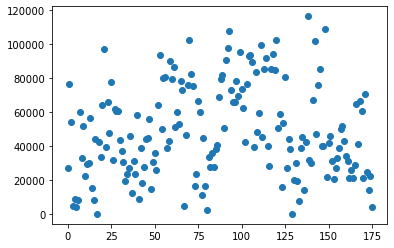

In [120]:
plt.scatter([x for x in range(len(all_population))], list(all_population.values()))

plt.show()

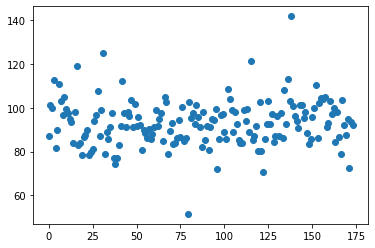

In [50]:

all_population = {}
for ln in all_rows:
    try:
        all_population[int(ln["NAME"][5:])] = float(ln["DP05_0004E"])
    except:
        continue
        all_population[int(ln["NAME"][5:])] = float(0.0)
plt.scatter([x for x in range(len(all_population))], list(all_population.values()))
plt.show()


In [64]:

df[['zipcode']].T


1        2        3        4        5        6        7      \
zipcode  10458.0  10019.0  10470.0  11212.0  10014.0  11373.0  10003.0   

           8        9        10     ...    49990    49991    49992    49993  \
zipcode  10027.0  11375.0  10016.0  ...  10004.0  11691.0  10128.0  10454.0   

           49994    49995    49996    49997    49998    49999  
zipcode  10466.0  10453.0  11211.0  10470.0  11375.0  10455.0  

[1 rows x 48179 columns]

In [131]:

zip_code_count = {}
for k in all_population.keys():
    zip_code_count[k] = 0
for idx, row in df.iterrows():
    if idx != 0:
        try:
            zip_code_count[int(row["zipcode"])] += 1
        except KeyError:
            continue
zip_code_count


{10001: 581,
 10002: 604,
 10003: 439,
 10004: 71,
 10005: 52,
 10006: 32,
 10007: 122,
 10009: 392,
 10010: 206,
 10011: 342,
 10012: 160,
 10013: 320,
 10014: 180,
 10016: 374,
 10017: 228,
 10018: 286,
 10019: 442,
 10020: 16,
 10021: 159,
 10022: 223,
 10024: 171,
 10025: 458,
 10026: 311,
 10027: 631,
 10028: 167,
 10029: 663,
 10030: 273,
 10031: 303,
 10032: 387,
 10033: 364,
 10034: 209,
 10035: 617,
 10036: 420,
 10037: 187,
 10038: 168,
 10039: 228,
 10040: 194,
 10044: 0,
 10065: 159,
 10075: 93,
 10128: 196,
 10280: 12,
 10301: 322,
 10302: 101,
 10303: 114,
 10304: 228,
 10305: 157,
 10306: 196,
 10307: 37,
 10308: 57,
 10309: 80,
 10310: 102,
 10312: 154,
 10314: 343,
 10451: 599,
 10452: 579,
 10453: 644,
 10454: 378,
 10455: 472,
 10456: 913,
 10457: 774,
 10458: 643,
 10459: 529,
 10460: 587,
 10461: 349,
 10462: 448,
 10463: 327,
 10464: 23,
 10465: 162,
 10466: 492,
 10467: 697,
 10468: 516,
 10469: 322,
 10470: 107,
 10471: 88,
 10472: 461,
 10473: 411,
 10474: 157,

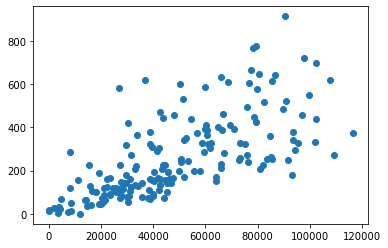

In [100]:
plt.scatter(list(all_population.values()), list(zip_code_count.values()))
plt.show()

In [101]:

model1_x = []
model1_y = []
for k in all_population.keys():
    model1_x.append(all_population[k])
    model1_y.append(zip_code_count[k])
model1_x = np.array(model1_x).reshape(-1, 1)
model1_y = np.array(model1_y).reshape(-1, 1)
model1_x.shape
    

(176, 1)

Analyze correlation between population and EMS calls.
[[0.00475071]]
0.4764715272360822
Select random population and EMS call volumes


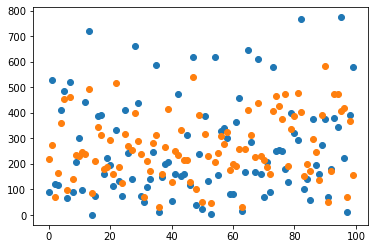

In [105]:

from sklearn.linear_model import LinearRegression

print("Analyze correlation between population and EMS calls.")

reg = LinearRegression().fit(model1_x, model1_y)
print(reg.coef_)
print(reg.score(model1_x, model1_y))

print("Select random population and EMS call volumes")
idx = np.random.choice(np.arange(len(model1_x)), 100, replace=False)
x_sample = model1_x[idx]
y_sample = model1_y[idx]

y_hat = reg.predict(x_sample)
plt.scatter([x for x in range(len(idx))],y_sample)
plt.scatter([x for x in range(len(idx))],y_hat)
plt.show()


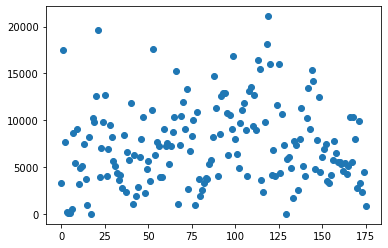

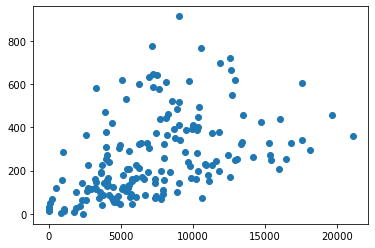

In [121]:

# >= 65 
old_population = {}
for ln in all_rows:
    try:
        old_population[int(ln["NAME"][5:])] = float(ln["DP05_0029E"])
    except:
        continue
        old_population[int(ln["NAME"][5:])] = float(0.0)
plt.scatter([x for x in range(len(old_population))], list(old_population.values()))
plt.show()
plt.scatter(list(old_population.values()), list(zip_code_count.values()))
plt.show()


Multivariate
[[ 0.00734415 -0.01935628]]
0.5319017838159505
Select random response time and predict travel time.


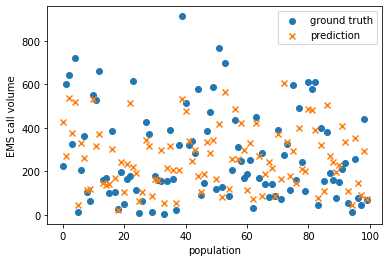

In [127]:

model1_x = []
model1_y = []
for k in all_population.keys():
    model1_x.append([all_population[k], old_population[k]])
    model1_y.append(zip_code_count[k])
model1_x = np.array(model1_x).reshape(-1, 2)
model1_y = np.array(model1_y).reshape(-1, 1)
model1_x.shape

print("Multivariate")

reg = LinearRegression().fit(model1_x, model1_y)
print(reg.coef_)
print(reg.score(model1_x, model1_y))

print("Select random response time and predict travel time.")
idx = np.random.choice(np.arange(len(model1_x)), 100, replace=False)
x_sample = model1_x[idx]
y_sample = model1_y[idx]

y_hat = reg.predict(x_sample)
lo = plt.scatter([x for x in range(len(idx))],y_sample,marker='o')
ll = plt.scatter([x for x in range(len(idx))],y_hat,marker='x')
plt.legend((lo, ll),
           ('ground truth', 'prediction'))
plt.xlabel("population")
plt.ylabel("EMS call volume")
plt.show()


In [129]:
df_income = pd.read_csv(HOME_PATH+"/ACSST5Y2021.S1902-Data.csv", encoding='utf-8')

all_rows_inc = []
for index, row in df_income.iterrows():
    if index>0 and int(row["NAME"][5:]) in nyc_zip_code:
        all_rows_inc.append(row)
        
all_rows_inc

[GEO_ID             860Z200US10001
 NAME                  ZCTA5 10001
 S1902_C01_001E              14273
 S1902_C01_001EA               NaN
 S1902_C01_001M                830
                         ...      
 S1902_C03_028E             116130
 S1902_C03_028EA               NaN
 S1902_C03_028M              10284
 S1902_C03_028MA               NaN
 Unnamed: 338                  NaN
 Name: 2, Length: 339, dtype: object,
 GEO_ID             860Z200US10002
 NAME                  ZCTA5 10002
 S1902_C01_001E              34737
 S1902_C01_001EA               NaN
 S1902_C01_001M               1319
                         ...      
 S1902_C03_028E              77248
 S1902_C03_028EA               NaN
 S1902_C03_028M               5232
 S1902_C03_028MA               NaN
 Unnamed: 338                  NaN
 Name: 3, Length: 339, dtype: object,
 GEO_ID             860Z200US10003
 NAME                  ZCTA5 10003
 S1902_C01_001E              25181
 S1902_C01_001EA               NaN
 S1902_C01_001

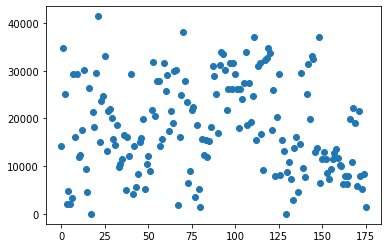

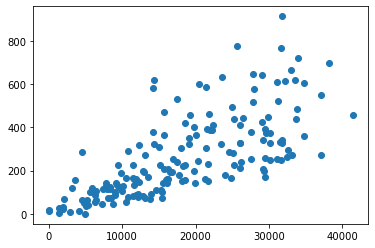

In [136]:

# income S1902_C01_001E

income = {}
for ln in all_rows_inc:
    try:
        income[int(ln["NAME"][5:])] = float(ln["S1902_C01_001E"])
    except:
        continue
        income[int(ln["NAME"][5:])] = float(0.0)

plt.scatter([x for x in range(len(income))], list(income.values()))
plt.show()
plt.scatter(list(income.values()), list(zip_code_count.values()))
plt.show()


In [137]:

model1_x = []
model1_y = []
for k in all_population.keys():
    model1_x.append([all_population[k], old_population[k], income[k]])
    model1_y.append(zip_code_count[k])
model1_x = np.array(model1_x).reshape(-1, 3)
model1_y = np.array(model1_y).reshape(-1, 1)
model1_x.shape

print("Multivariate")

reg = LinearRegression().fit(model1_x, model1_y)
print(reg.coef_)
print(reg.score(model1_x, model1_y))

print("Select random response time and predict travel time.")
idx = np.random.choice(np.arange(len(model1_x)), 100, replace=False)
x_sample = model1_x[idx]
y_sample = model1_y[idx]

y_hat = reg.predict(x_sample)
lo = plt.scatter([x for x in range(len(idx))],y_sample,marker='o')
ll = plt.scatter([x for x in range(len(idx))],y_hat,marker='x')
plt.legend((lo, ll),
           ('ground truth', 'prediction'))
plt.xlabel("population")
plt.ylabel("EMS call volume")
plt.show()


Multivariate
[[ 0.00240458 -0.02734704  0.01777551]]
0.6193281220038503
Select random response time and predict travel time.


In [181]:

zip_code_time = {}
for k in all_population.keys():
    zip_code_time[k] = []
for idx, row in df.iterrows():
    if idx != 0:
        try:
            zip_code_time[int(row["zipcode"])].append(row["incident_travel_tm_seconds_qy"])
        except KeyError:
            continue
for k, item in zip_code_time.items():
    try:
        zip_code_time[k] = sum(item) / len(item)
    except ZeroDivisionError:
        zip_code_time[k] = 0
zip_code_time


{10001: 392.6092943201377,
 10002: 432.05132450331126,
 10003: 374.8359908883827,
 10004: 395.9718309859155,
 10005: 355.7307692307692,
 10006: 398.75,
 10007: 454.1639344262295,
 10009: 422.10714285714283,
 10010: 352.3495145631068,
 10011: 380.4269005847953,
 10012: 464.0875,
 10013: 500.203125,
 10014: 442.7,
 10016: 349.56417112299465,
 10017: 348.7236842105263,
 10018: 448.47202797202794,
 10019: 463.1561085972851,
 10020: 412.5625,
 10021: 379.44025157232704,
 10022: 408.5470852017937,
 10024: 441.2865497076023,
 10025: 487.5414847161572,
 10026: 567.5016077170418,
 10027: 524.1806656101427,
 10028: 426.748502994012,
 10029: 523.8144796380091,
 10030: 570.054945054945,
 10031: 557.1320132013201,
 10032: 470.87855297157626,
 10033: 505.1208791208791,
 10034: 554.8133971291866,
 10035: 596.1037277147487,
 10036: 391.3285714285714,
 10037: 522.2085561497327,
 10038: 385.0892857142857,
 10039: 656.4868421052631,
 10040: 512.0360824742268,
 10044: 0,
 10065: 444.6981132075472,
 10075:

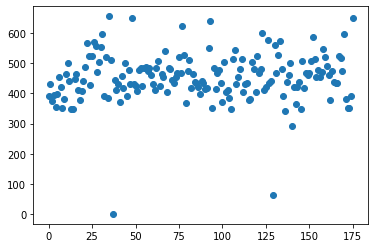

In [182]:
plt.scatter([x for x in range(len(zip_code_time))], list(zip_code_time.values()))
plt.show()

In [183]:
plt.scatter(list(all_population.values()), list(zip_code_time.values()))
plt.show()


In [184]:
plt.scatter(list(old_population.values()), list(zip_code_time.values()))
plt.show()

In [185]:
plt.scatter(list(income.values()), list(zip_code_time.values()))
plt.show()

Multivariate
[[ 0.00116364 -0.00161592 -0.00225353]]
0.017057295950195783
Select random response time and predict travel time.


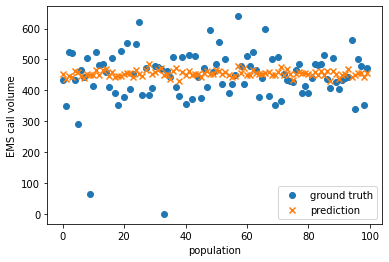

In [186]:
model1_x = []
model1_y = []
for k in all_population.keys():
    model1_x.append([all_population[k], old_population[k], income[k]])
    model1_y.append(zip_code_time[k])
model1_x = np.array(model1_x).reshape(-1, 3)
model1_y = np.array(model1_y).reshape(-1, 1)
model1_x.shape

print("Multivariate")

reg = LinearRegression().fit(model1_x, model1_y)
print(reg.coef_)
print(reg.score(model1_x, model1_y))

print("Select random response time and predict travel time.")
idx = np.random.choice(np.arange(len(model1_x)), 100, replace=False)
x_sample = model1_x[idx]
y_sample = model1_y[idx]

y_hat = reg.predict(x_sample)
lo = plt.scatter([x for x in range(len(idx))],y_sample,marker='o')
ll = plt.scatter([x for x in range(len(idx))],y_hat,marker='x')
plt.legend((lo, ll),
           ('ground truth', 'prediction'))
plt.xlabel("population")
plt.ylabel("EMS call volume")
plt.show()

In [ ]:

print("Select random train/test idx.")
idx = np.random.choice(np.arange(len(model1_x)), 100, replace=False)
x_sample = model1_x[idx]
y_sample = model1_y[idx]

In [192]:
df["final_call_type"]

1          DRUG
2          DRUG
3        TRAUMA
4          SICK
5        INJURY
          ...  
49995    INJURY
49996    PEDSTR
49997    INJURY
49998    INJURY
49999       UNC
Name: final_call_type, Length: 46662, dtype: object

In [198]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df["final_call_type"])
final_labels = le.transform(df["final_call_type"])
df["final_labels"] = final_labels
le = preprocessing.LabelEncoder()
le.fit(df["initial_call_type"])
init_labels = le.transform(df["initial_call_type"])
df["init_labels"] = init_labels
df


cad_incident_id   incident_datetime initial_call_type  \
1            220904735 2022-03-31 23:59:45              DRUG   
2            220904734 2022-03-31 23:59:02              DRUG   
3            220904733 2022-03-31 23:58:37            TRAUMA   
4            220904732 2022-03-31 23:58:19              SICK   
5            220904731 2022-03-31 23:58:10            INJURY   
...                ...                 ...               ...   
49995        220782275 2022-03-19 13:27:44            INJURY   
49996        220782274 2022-03-19 13:27:35            PEDSTR   
49997        220782273 2022-03-19 13:27:34            INJURY   
49998        220782272 2022-03-19 13:27:25            INJURY   
49999        220782270 2022-03-19 13:27:14               UNC   

       initial_severity_level_code final_call_type  final_severity_level_code  \
1                                4            DRUG                          4   
2                                4            DRUG                          4   
3                                2          TRAUMA                          2   
4                                6            SICK                          6   
5                                5          INJURY                          5   
...                            ...             ...                        ...   
49995                            5          INJURY                          5   
49996                            3          PEDSTR                          3   
49997                            5          INJURY                          5   
49998                            5          INJURY                          5   
49999                            2             UNC                          2   

      valid_dispatch_rspns_time_indc  dispatch_response_seconds_qy  \
1                                  Y                             0   
2                                  Y                            11   
3                                  Y                            33   
4                                  Y                            61   
5                                  Y                            34   
...                              ...                           ...   
49995                              Y                            22   
49996                              Y                             5   
49997                              Y                            12   
49998                              Y                            16   
49999                              Y                            19   

      valid_incident_rspns_time_indc  incident_close_datetime  ...  \
1                                  Y  2022-04-01T00:45:52.000  ...   
2                                  Y  2022-04-01T00:55:56.000  ...   
3                                  Y  2022-04-01T00:12:02.000  ...   
4                                  Y  2022-04-01T01:05:19.000  ...   
5                                  Y  2022-04-01T00:51:18.000  ...   
...                              ...                      ...  ...   
49995                              Y  2022-03-19T13:41:57.000  ...   
49996                              Y  2022-03-19T15:00:04.000  ...   
49997                              Y  2022-03-19T15:32:01.000  ...   
49998                              Y  2022-03-19T13:34:44.000  ...   
49999                              Y  2022-03-19T14:27:22.000  ...   

      first_assignment_datetime first_activation_datetime  \
1           2022-03-31 23:59:45       2022-03-31 23:59:45   
2           2022-03-31 23:59:13       2022-03-31 23:59:19   
3           2022-03-31 23:59:10       2022-03-31 23:59:47   
4           2022-03-31 23:59:20       2022-03-31 23:59:34   
5           2022-03-31 23:58:44       2022-03-31 23:58:53   
...                         ...                       ...   
49995       2022-03-19 13:28:06       2022-03-19 13:28:13   
49996       2022-03-19 13:27:40       2022-03-19 13:27:53   
49997       2022-03-19 13:27:46   

In [221]:
features = df[['final_labels', 'incident_travel_tm_seconds_qy']].to_numpy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)


In [227]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=15)
label = kmeans.fit_predict(features)

print(label)


[ 0  0  6 ...  2  8 11]


In [223]:
features[label == 0]

array([[ 1.66937736, -1.05059676],
       [ 1.70179484, -0.0959799 ],
       [ 1.70179484, -0.36688468],
       ...,
       [ 1.76662981, -0.17338127],
       [ 1.70179484,  0.26845154],
       [ 1.70179484,  0.06204789]])

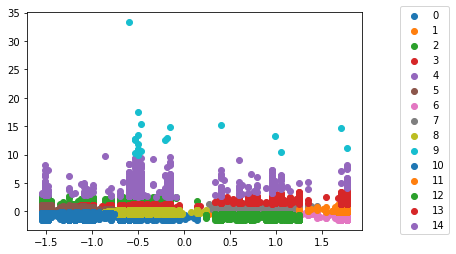

In [230]:

df['label'] = label
u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(features[label == i, 0] , features[label == i , 1], label = i)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()


In [246]:

from sklearn.preprocessing import MinMaxScaler

features = df[['final_labels', 'incident_travel_tm_seconds_qy', 'initial_severity_level_code']].to_numpy()
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

from sklearn.mixture import GaussianMixture

# gm = GaussianMixture(n_components=15).fit_predict(features)
gm = KMeans(n_clusters=15).fit_predict(features)
gm


array([10, 10,  5, ...,  0,  0,  5], dtype=int32)

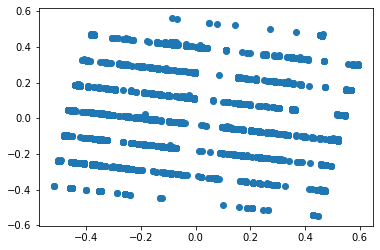

In [247]:
plt.scatter(transform_f[:,0] , transform_f[:,1])

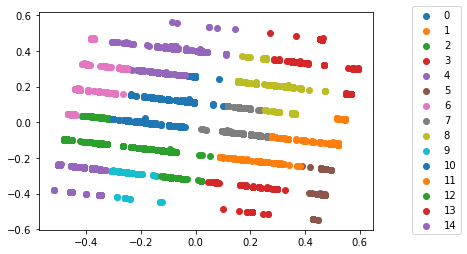

In [248]:
from sklearn.decomposition import PCA

pca = PCA(2)

#Transform the data
transform_f = pca.fit_transform(features)

u_labels = np.unique(gm)

for i in u_labels:
    plt.scatter(transform_f[gm == i, 0] , transform_f[gm == i , 1], label = i)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()


In [256]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

features = df[['init_labels', 'incident_travel_tm_seconds_qy', 'initial_severity_level_code']].to_numpy()
scaler = MinMaxScaler()
features = scaler.fit_transform(features)
y = df[['final_labels']].to_numpy()

X, y = make_classification(n_samples=46662, n_features=3,
                           n_informative=3, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X, y)



RandomForestClassifier(max_depth=5, random_state=0)

In [257]:
clf.predict(features[:5, :])

array([1, 1, 1, 1, 1])

In [260]:
clf.decision_path(features[0].reshape(1, 3))

(<1x5984 sparse matrix of type '<class 'numpy.int64'>'
 	with 600 stored elements in Compressed Sparse Row format>,
 array([   0,   61,  120,  175,  236,  295,  358,  417,  478,  539,  600,
         663,  726,  787,  846,  903,  964, 1025, 1078, 1141, 1204, 1253,
        1308, 1369, 1426, 1489, 1544, 1603, 1666, 1721, 1776, 1835, 1898,
        1959, 2010, 2071, 2130, 2185, 2248, 2311, 2372, 2435, 2490, 2553,
        2610, 2669, 2726, 2783, 2844, 2907, 2968, 3029, 3092, 3153, 3214,
        3277, 3334, 3397, 3460, 3517, 3580, 3633, 3694, 3757, 3818, 3877,
        3940, 4001, 4060, 4123, 4182, 4243, 4306, 4361, 4420, 4483, 4540,
        4601, 4662, 4723, 4784, 4845, 4906, 4967, 5030, 5087, 5142, 5203,
        5260, 5321, 5374, 5435, 5494, 5555, 5612, 5673, 5732, 5795, 5858,
        5921, 5984]))

In [261]:
clf.score(features, y)

0.502014487163002

In [266]:
u_labels = np.unique(df[['final_labels']].to_numpy())
len(u_labels)

103

In [264]:
df[['final_labels']].to_numpy()

array([[ 29],
       [ 29],
       [ 99],
       ...,
       [ 43],
       [ 43],
       [100]])